In [248]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Simple Gradient Descent

In [249]:
def grad_descent(func, grad, lamda, data, tetha, n):
    tethas = [tetha]
    func_values = [func(data,tetha)] 
    for i in range(n):
        tetha = tetha - lamda*grad(data,tetha)
        tethas.append(tetha)
        func_values.append(func(data,tetha))
    return tethas, func_values

In [357]:
def LSgrad_descent(func, grad, lamda0, data, tetha, n, alpha = 0.5, betha = 0.8, gama = 0.5):
    tethas = [tetha]
    cur_func = func(data,tetha)
    func_values = [cur_func] 
    cur_tetha = tetha
    
    for i in range(n):
        lamda = lamda0
        #line search
        while(True):
            cur_grad = grad(data,cur_tetha)
            new_tetha = cur_tetha - lamda*cur_grad
            new_func = func(data, new_tetha)
            new_grad = grad(data,new_tetha)
            
            C1 = (new_func < cur_func - alpha*lamda*np.linalg.norm(cur_grad)**2)
            C2 = np.dot(cur_grad, new_grad) < gama*np.dot(cur_grad,cur_grad)
            
            if C1 and C2:
                break
            elif C2:
                lamda = betha*lamda
            elif C1:
                lamda = lamda/betha
            else:
                print 'Error in Gradient!'
                return
            '''
            if C1:
                break
            else:
                lamda = betha*lamda'''
        #print lamda, C1, C2
        tethas.append(new_tetha)
        func_values.append(new_func)
        cur_tetha = new_tetha
        cur_func = new_func
    return tethas, func_values

In [374]:
def Newt_grad_descent(func, grad, hess, lamda0, data, tetha, n, alpha = 0.5, betha = 0.8, gama = 0.5):
    tethas = [tetha]
    cur_func = func(data,tetha)
    func_values = [cur_func] 
    cur_tetha = tetha
    
    for i in range(n):
        lamda = lamda0
        #line search
        while(True):
            cur_grad = grad(data,cur_tetha)
            cur_hess = hess(data,cur_tetha)
            cur_grad_hess = np.dot(np.linalg.inv(cur_hess), cur_grad)
            new_tetha = cur_tetha - lamda*cur_grad_hess
            new_func = func(data, new_tetha)
            new_grad = grad(data,new_tetha)
            
            C1 = (new_func <= cur_func - alpha*lamda*np.dot(cur_grad_hess, cur_grad))
            C2 = np.dot(cur_grad_hess, new_grad) <= gama*np.dot(cur_grad_hess,cur_grad)
            
            if C1 and C2:
                break
            elif C2:
                lamda = betha*lamda
            elif C1:
                lamda = lamda/betha
            else:
                print 'Error in Gradient!'
                return
            '''
            if C1:
                break
            else:
                lamda = betha*lamda'''
        print lamda, C1, C2
        tethas.append(new_tetha)
        func_values.append(new_func)
        cur_tetha = new_tetha
        cur_func = new_func
    return tethas, func_values

### Stochastic Gradient Descent 

In [379]:
def SGD(func, grad, lamdas, data, tetha, n):
    tethas = [tetha]
    func_values = [func(data,tetha)] 
    for i in range(n):
        tetha = tetha - lamdas[i]*grad(data,tetha)
        tethas.append(tetha)
        func_values.append(func(data,tetha))
    return tethas, func_values

### Quadratic Target

In [392]:
def quad_func(data,tetha):
    sigma = data['sigma']
    func_val = np.dot(tetha.T, np.dot(sigma,tetha))
    grad = 2*np.dot(sigma,tetha)
    hess = 2*sigma
    return func_val

def quad_grad(data, tetha):
    sigma = data['sigma']
    grad = 2*np.dot(sigma,tetha)
    return grad

def quad_grad_noise(data, tetha):
    sigma = data['sigma']
    d = sigma.shape[0]
    grad = 2*np.dot(sigma,tetha) + np.random.multivariate_normal(np.zeros(d), 100000*np.eye(d))
    return grad


def quad_hess(data, tetha):
    sigma = data['sigma']
    hess = 2*sigma
    return hess

[1592.23943032 -721.50961223  186.56842047   46.64210512]
[3.72403544e+00 4.29347782e-06 7.62186777e-01 1.90546694e-01]
1 True True
1 True True
1 True True
1 True True
1 True True
1 True True
1 True True
1 True True
1 True True
1 True True
[0. 0. 0. 0.]
[array([ 4000, -5000,  4000,  1000]), array([ -4000.,  15000., -20000.,  -5000.]), array([     0., -15000.,  40000.,  10000.]), array([     0.,   5000., -40000., -10000.]), array([    0.,     0., 20000.,  5000.]), array([    0.,     0., -4000., -1000.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.])]


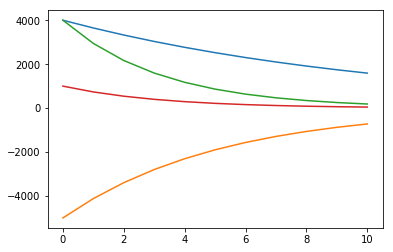

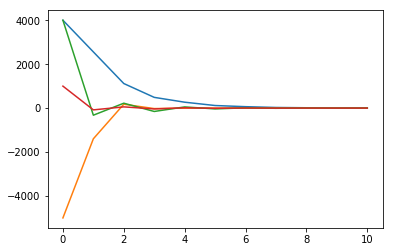

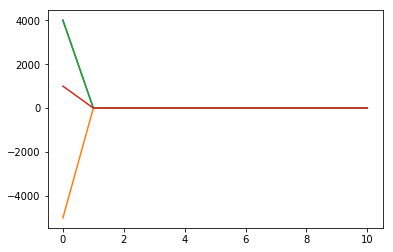

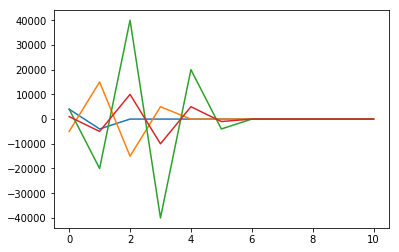

In [401]:
#Generate data
sigma = np.diag([1,2,3,3])
data = dict()
data['sigma'] = sigma
tetha_zero = np.array([4000,-5000,4000,1000]) 

n = 10


tethas, vals = grad_descent(quad_func, quad_grad, 0.044, data, tetha_zero, n)
plt.plot(tethas)
print tethas[-1]

tethas, vals = LSgrad_descent(quad_func, quad_grad, 10, data, tetha_zero, n, gama = 0.5)
plt.figure()
plt.plot(tethas)
print tethas[-1]
tethas, vals = Newt_grad_descent(quad_func, quad_grad, quad_hess, 1, data, tetha_zero, n, gama = 0.5)
plt.figure()
plt.plot(tethas)
print tethas[-1]
lamdas = [1.0/i for i in range(1,n+1)]
tethas, vals = SGD(quad_func, quad_grad,  lamdas, data, tetha_zero, n)
plt.figure()
plt.plot(tethas)
print tethas

### Negative Log-likelihood 

In [479]:
def neg_log(data,tetha):
    x = data['x']
    y = data['y']
    n = len(y)
    func_val = 0
    grad = 0
    hess = 0
    for i in range(n):
        val =  np.exp(-1*y[i]*np.dot(x[i,:], tetha))
        func_val += np.log(1+val)
        grad += -1*val*y[i]*x[i,:]/(1+val)
    return func_val/n

def grad_neg_log(data,tetha):
    x = data['x']
    y = data['y']
    n = len(y)
    grad = 0
    for i in range(n):
        val =  np.exp(-1*y[i]*np.dot(x[i,:], tetha))
        grad += -1*val*y[i]*x[i,:]/(1+val)
    return grad/n

def grad_neg_log_app(data,tetha):
    x = data['x']
    y = data['y']
    s = data['s']
    n = len(y)
    grad = 0
    for i in range(s):
        index = np.random.randint(n)
        val =  np.exp(-1*y[index]*np.dot(x[index,:], tetha))
        grad += -1*val*y[index]*x[index,:]/(1+val)
    return grad/s

### Create data 

In [419]:
tetha_true = np.array([3, 5])
d = len(tetha_true)
x = np.random.multivariate_normal(np.zeros(d), 6*np.eye(d), size=200)
y_true =  (np.dot(x,tetha_true) > 0)*1

In [430]:
data = dict()
data['x'] = x
data['y'] = y_true
tetha_zero =  3*np.array([10,-10])
print neg_log(data,tetha_true)
print grad_neg_log(data,tetha_zero)
print grad_neg_log_app(data,tetha_zero,s=10)

0.38478660262936315
[ 0.1867693  -0.74725033]
[0. 0.]


0.3606993902840741
0.36826278312779887


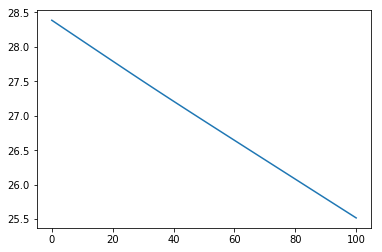

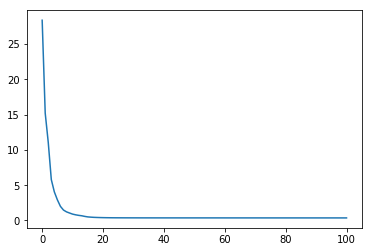

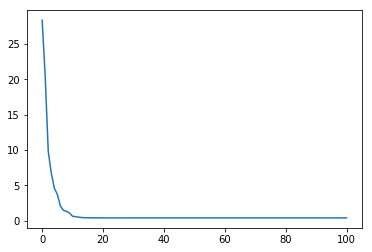

In [442]:
n = 100
tethas, vals = grad_descent(neg_log, grad_neg_log, 0.05, data, tetha_zero, n)
plt.plot(vals)
plt.figure()
tethas, vals = LSgrad_descent(neg_log, grad_neg_log, 2, data, tetha_zero, n,gama=0.9)
plt.plot(vals)
print vals[-1]
plt.figure()
lamdas = [1.0/i for i in range(1,n+1)]
data['s'] = 30
tethas, vals = SGD(neg_log, grad_neg_log_app, lamdas, data, tetha_zero, n)
plt.plot(vals)
print vals[-1]

In [854]:
#Calculating the variance of gradient
print tetha_true
tetha_zero =  10*np.array([3,5])
print tetha_zero
grads = []
true_grad = grad_neg_log(data,tetha_zero)
print true_grad
data['s'] = 10
for i in range(100):
    cur_grad = grad_neg_log_app(data,tetha_zero)
    #print cur_grad
    #grads.append(np.linalg.norm(cur_grad-true_grad))
    grads.append(cur_grad)
#print np.mean(grads)
print np.var(grads)

[3 5]
[30 50]
[ 0.00426602 -0.00262976]
6.462233424389654e-05


In [462]:
print tetha_true/np.linalg.norm(tetha_true)
print tethas[-1]/np.linalg.norm(tethas[-1])

tethas[-1]/tetha_true

[0.51449576 0.85749293]
[0.47741375 0.87867862]


array([1.71602212, 1.89500024])

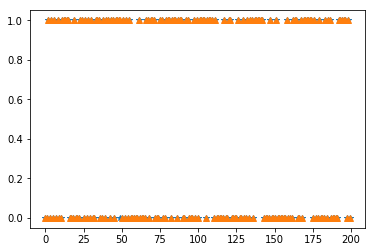

In [463]:
plt.plot(y_true,'*')
y_pred = 1*(np.dot(x,tethas[-1]) > 0)
plt.plot(y_pred, '^')

### Visualize the energy function

In [240]:
from mpl_toolkits.mplot3d import Axes3D

mus = np.arange(2, 4, 0.2)
sigmas = np.arange(3, 6, 0.2)
M = np.meshgrid(mus, sigmas, indexing='ij')
print M[0].shape
print M[1].shape

(10, 15)
(10, 15)


In [241]:
grid = np.vstack([M[0].ravel(), M[1].ravel()]).T
vals = []
for g in grid:
    val,_ = neg_log(data, g)
    vals.append(val)

In [242]:
vals = np.array([vals])
vals = vals.reshape(M[0].shape)
print vals.shape

(10, 15)


In [244]:
a = plt.pcolormesh(M[0], M[1], vals)
#plt.clabel(a, inline=1, fontsize=10)
plt.show()

In [218]:
vals = vals.flatten()

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(grid[:,0], grid[:,1], vals, '*')
plt.show()

### Student Model 

In [245]:
def student_func(data, tetha):
    x = data['x']
    d = data['d']
    mu = tetha[0]
    sigma = tetha[1]
    n = len(x)
    val = 0
    for i in range(n):
        C = ((x[i]-mu)**2)/(d*(sigma**2))
        val += np.log(sigma) + 0.5*(d+1)*np.log(1 + C)
    return val
                            
def student_grad(data, tetha):
    x = data['x']
    d = data['d']
    mu = tetha[0]
    sigma = tetha[1]
    n = len(x)
    grad = np.zeros(2)
    for i in range(n):
        C = ((x[i]-mu)**2)/(d*(sigma**2))
        grad[0] += (d+1)*(mu-x[i])/((1+C)*d*(sigma)**2)  #sigma
        grad[1] += (1.0/sigma)*(1 - C*(d+1)/(1+C))
    return grad     



### Generate Data 

In [347]:
from numpy.random import standard_t
def generate_t(mu, sigma, d, n):
    return mu + sigma*standard_t(d, size=n)

In [348]:
d = 400
x1 = generate_t(1,2,d, 250)
x2 = generate_t(9,2,d, 250)
x = np.concatenate([x1,x2])
print x.shape

(500,)


0.0381469726562 True True
0.01953125 True True
0.015625 True True
0.0125 True True
0.0125 True True
0.0125 True True
0.0125 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True
0.015625 True True


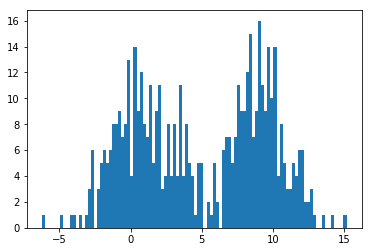

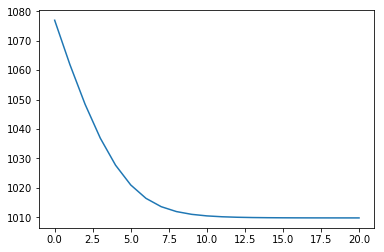

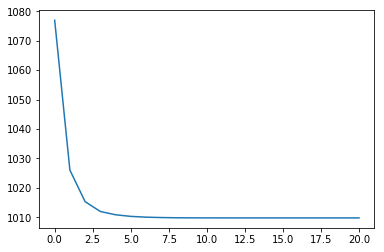

In [350]:
plt.hist(x,bins=100)
data = dict()
data['x'] = x
data['d'] = d
mu_zero = np.array([3.2, 6.5])
tethas, vals =  grad_descent(student_func,student_grad, 0.01,data, mu_zero, 20 )
plt.figure()
plt.plot(vals)
tethas, vals =  LSgrad_descent(student_func,student_grad, 0.01,data, mu_zero, 20,gama=0.7)
plt.figure()
plt.plot(vals)

### Visualize the energy function

In [101]:
from mpl_toolkits.mplot3d import Axes3D

mus = np.arange(-10, 10, 0.2)
sigmas = np.arange(1, 10, 0.2)
M = np.meshgrid(mus, sigmas, indexing='ij')
grid = np.vstack([M[0].ravel(), M[1].ravel()]).T
vals = []
for g in grid:
    val = student_func(data, g)
    vals.append(val)

In [102]:
vals = np.array([vals])

In [103]:
vals = vals.flatten()


In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(grid[:,0], grid[:,1], vals, '*')
plt.show()
